In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name:str
    age:str
    final:str

In [11]:
def first_node(state:AgentState)-> AgentState:
    """This is the first node"""
    state['final'] = f"Hi {state['name']}"
    return state

def second_node(state:AgentState) ->  AgentState:
    """This is the second node"""
    state['final'] = state['final'] + f"Your age is {state['age']}"
    return state

In [12]:
graph = StateGraph(AgentState)

graph.add_node("first", first_node)
graph.add_node("second", second_node)

graph.add_edge("first", "second")

graph.set_entry_point("first")
graph.set_finish_point("second")

app = graph.compile()

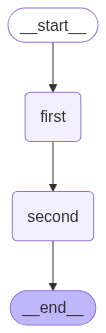

In [13]:
from IPython.display import display , Image

display(Image(app.get_graph(). draw_mermaid_png()))

In [14]:
app.invoke({"name":"Sam", "age": "22"})

{'name': 'Sam', 'age': '22', 'final': 'Hi SamYour age is 22'}

In [27]:
# Exercise
from langgraph.graph import StateGraph
from typing import TypedDict, List

class AgentState(TypedDict):
    name:str
    age: str
    skills : List[str]
    greet: str

In [52]:
def node_one(state:AgentState)-> AgentState:
    """This is the first node"""
    state["greet"] = f"{state['name']} welcome to the system! "    
    return state

def node_two(state:AgentState)-> AgentState:
    """This is the second node"""
    state["greet"] =  state['greet'] +  f"You are {state['age']} years old!"
    return state

def node_three(state: AgentState)-> AgentState:
    """This is the third state"""
    state["greet"] =  state['greet'] + f"You have skills in {','.join(state['skills'])}"
    return state
    

In [53]:
# build the graph

graph = StateGraph(AgentState)

graph.add_node("one", node_one)
graph.add_node("two", node_two)
graph.add_node("three", node_three)

graph.add_edge("one","two")
graph.add_edge("two", "three")

graph.set_entry_point("one")
graph.set_finish_point("three")

app = graph.compile()

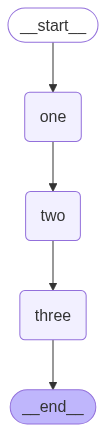

In [30]:
from IPython.display import display , Image

display(Image(app.get_graph().draw_mermaid_png()))

In [54]:
app.invoke({"name":"Steve", "age": "31", "skills": ["scinece", "maths"]})

{'name': 'Steve',
 'age': '31',
 'skills': ['scinece', 'maths'],
 'greet': 'Steve welcome to the system! You are 31 years old!You have skills in scinece,maths'}